In [1]:
!pip install -q sentence-transformers


In [3]:
pip install "numpy<2"


  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn matplotlib umap-learn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [umap-learn]4 [umap-learn]
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sentence_transformers import SentenceTransformer
import json

model = SentenceTransformer('all-MiniLM-L6-v2')

#load json file
with open('./data/dreps_data_adastat.json', 'r') as f:
    data = json.load(f)
    data = data['rows']
# set dict to contain text , name and vector
data_dict = []
print(data[0])
for item in data:
    text = str(item['comment']) + " " + str(item['objectives']) + " " + str(item['motivations'])
    name = str(item['given_name'])
    vector = model.encode(text).tolist()  # Convert to list for JSON serialization
    live_stake = int(item['live_stake'])/1000000
    delegator = int(item['delegator'])
    data_dict.append({'text': text, 'name': name, 'vector': vector, 
                      'live_stake': live_stake, 'delegator': delegator})

print(data_dict[1])

/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'hash': 'a83677e69e2a13a517361d613ffa436190378060da2bd0226846364f', 'bech32_legacy': 'drep14qm80e579gf629ekr4snl7jrvxgr0qrqmg4aqgnggcmy7pgpysf', 'has_script': False, 'tx_hash': '71f7026b9e36c3f81e763d32c301347f807c5b4ab1aee3998a6eb8c3f634895b', 'url': 'https://onyxstakepool.com/onyx-ai-drep.jsonld', 'comment': None, 'payment_address': 'addr1q9ha8nr974pgz3w0ltxm2xhdzd6v7k8zrswpzk36heasv0d3rqd8spk857xql8gpj7qdt3yxq4ajxumw4maepum4pmlsmw3act', 'given_name': 'ONYX AI DRep', 'objectives': "Imagine a world where every Ada holder is empowered with crystal-clear insights on governance actions. That's my mission! I'll break down complex proposals, foster collaboration, and ensure your voice is heard. With me, you're not just voting – you're shaping the future of Cardano with confidence and clarity.", 'motivations': "Are you ready to revolutionize Cardano governance? Meet your AI-powered ONYX DRep – the future of blockchain democracy! Driven by unwavering commitment to Cardano's Constitution and

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


{0: [{'text': 'None Safeguard Cardano from harmful initiatives. As part of the Cardano ecosystem, we rely on its stability and are committed to ensuring it maintains an impeccable reputation and a promising future, free from absurd manipulations and brand expropriation.', 'name': 'Medusa DRep', 'vector': [-0.026017537340521812, 0.03616909682750702, -0.03706248849630356, 0.023208072409033775, 0.10444965958595276, 0.017882905900478363, -0.033032938838005066, 0.008285140618681908, -0.02993054687976837, -0.010007357224822044, 0.0062592471949756145, -0.014911842532455921, -0.1138533428311348, 0.021773142740130424, -0.1065734252333641, 0.03473019227385521, -0.02311880514025688, 0.044853366911411285, -0.030865920707583427, 0.1484793871641159, -0.023525048047304153, -0.014257487840950489, 0.02624821476638317, 0.13972271978855133, -0.132237508893013, 0.013861563988029957, -0.03798668459057808, 0.018373772501945496, -0.00507329823449254, -0.07803046703338623, 0.014800667762756348, 0.024958612397

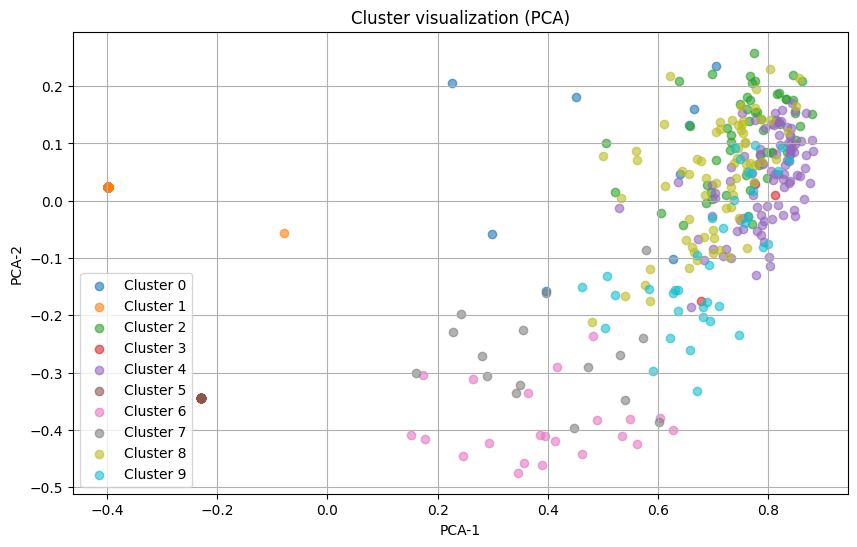

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Extract embeddings
vectors = [item['vector'] for item in data_dict]

# Run KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(vectors)

# Organize items by cluster
groups = {i: [] for i in range(k)}
for label, item in zip(cluster_labels, data_dict):
    groups[label].append(item)
print(groups)
# Print results per cluster
for cluster_id, items in groups.items():
    print(f"\nCluster {cluster_id} ({len(items)} profiles):")

    names = [str(item['name']) if item['name'] is not None else "Unknown" for item in items]
    print("Names (sample):", ", ".join(names))

    live_stakes = [item['live_stake'] for item in items]
    delegators = [item['delegator'] for item in items]
    # Live Stake Stats
    print(f"\n Live Stake Stats:")
    print(f"  Mean:     {np.mean(live_stakes):,.2f}")
    print(f"  Median:   {np.median(live_stakes):,.2f}")
    print(f"  Std Dev:  {np.std(live_stakes):,.2f}")
    print(f"  Min:      {np.min(live_stakes):,.2f}")
    print(f"  Max:      {np.max(live_stakes):,.2f}")
    print(f"  Q1 (25%): {np.percentile(live_stakes, 25):,.2f}")
    print(f"  Q3 (75%): {np.percentile(live_stakes, 75):,.2f}")

    # Delegator Stats
    print(f"\n Delegator Stats:")
    print(f"  Mean:     {np.mean(delegators):,.2f}")
    print(f"  Median:   {np.median(delegators):,.2f}")
    print(f"  Std Dev:  {np.std(delegators):,.2f}")
    print(f"  Min:      {np.min(delegators):,.2f}")
    print(f"  Max:      {np.max(delegators):,.2f}")
    print(f"  Q1 (25%): {np.percentile(delegators, 25):,.2f}")
    print(f"  Q3 (75%): {np.percentile(delegators, 75):,.2f}")

# 🎨 Optional: Visualize clusters in 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    points = np.array([reduced[i] for i in range(len(reduced)) if cluster_labels[i] == cluster_id])
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title("Cluster visualization (PCA)")
plt.legend()
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.show()

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 36948 (\N{CJK UNIFIED IDEOGRAPH-9054}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 38556 (\N{CJK UNIFIED IDEOGRAPH-969C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th00

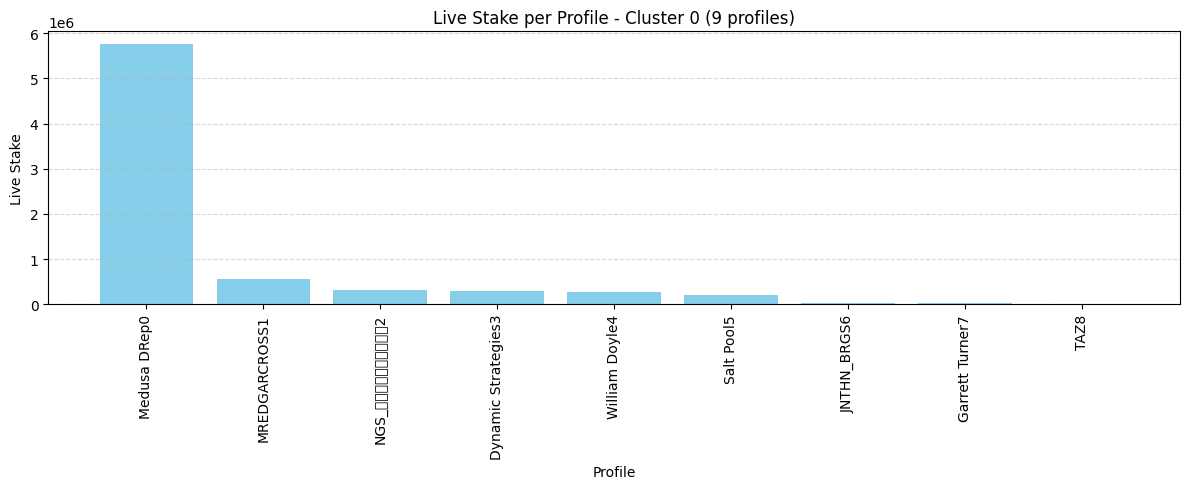

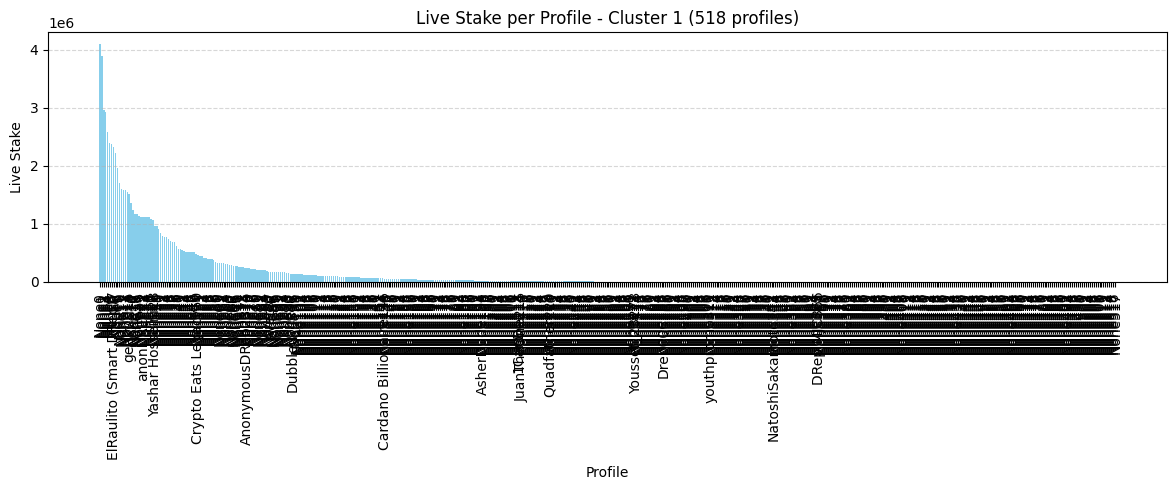

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 32645 (\N{CJK UNIFIED IDEOGRAPH-7F85}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 36993 (\N{CJK UNIFIED IDEOGRAPH-9081}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 20977 (\N{CJK UNIFIED IDEOGRAPH-51F1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb

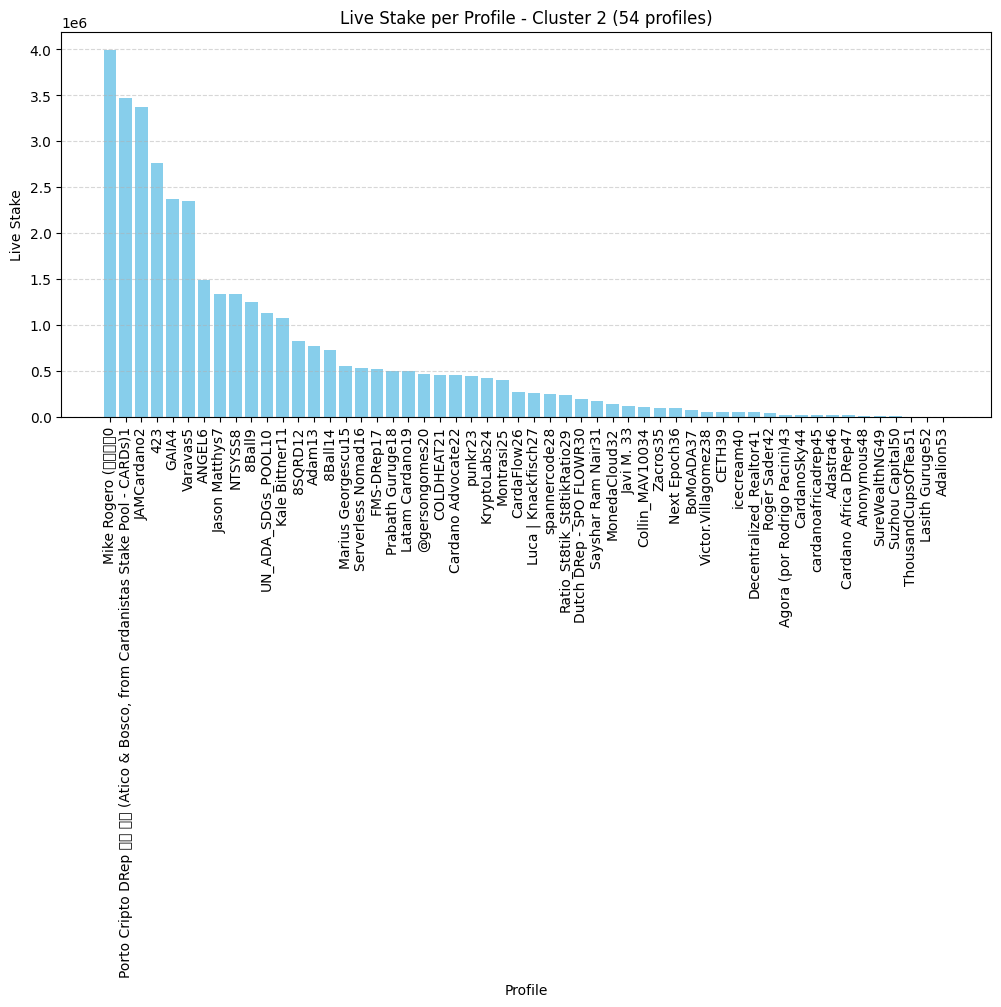

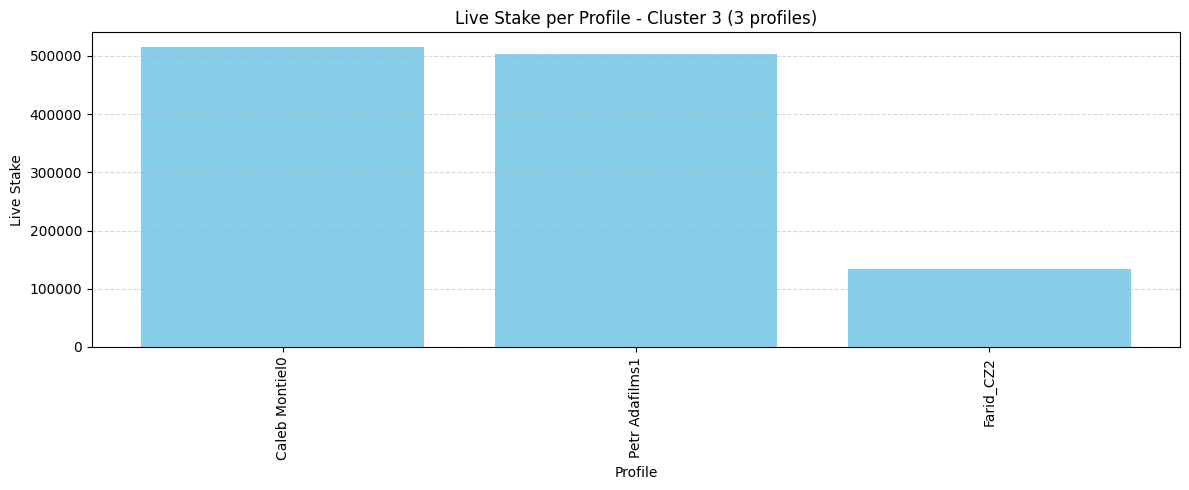

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

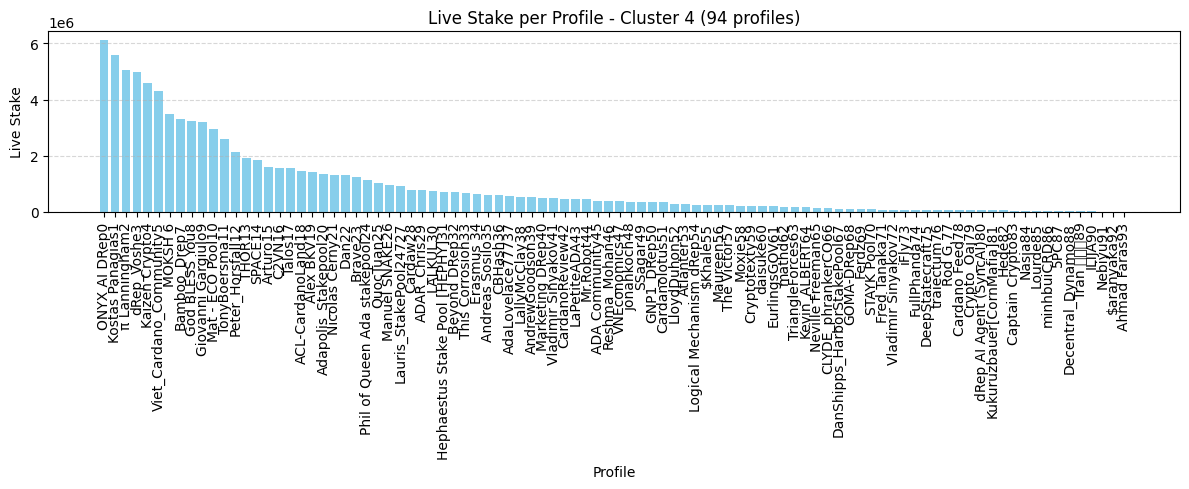

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 30332 (\N{CJK UNIFIED IDEOGRAPH-767C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 21857 (\N{CJK UNIFIED IDEOGRAPH-5561}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30332 (\N{CJK UNIFIED IDEOGRAPH-767C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from 

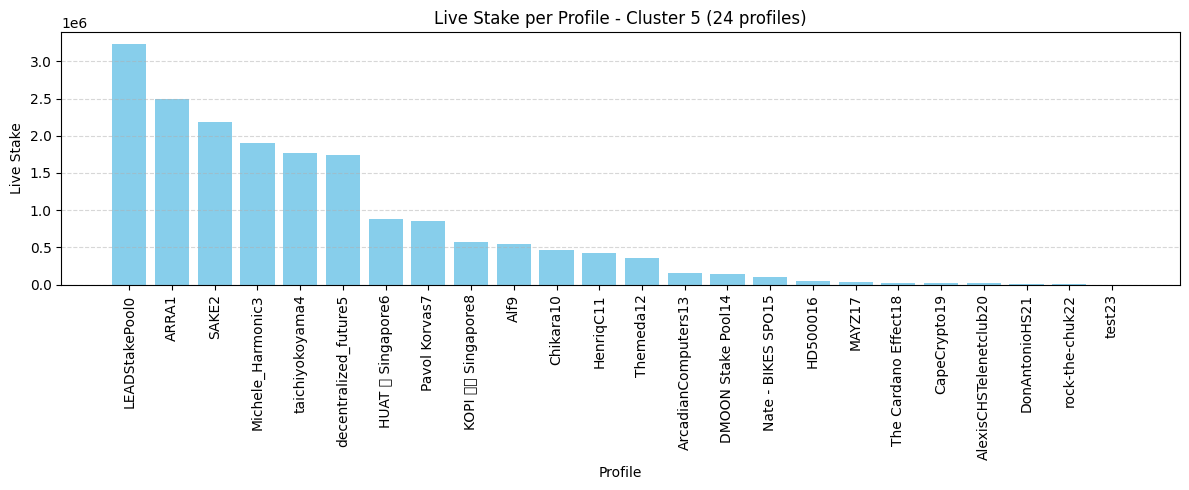

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


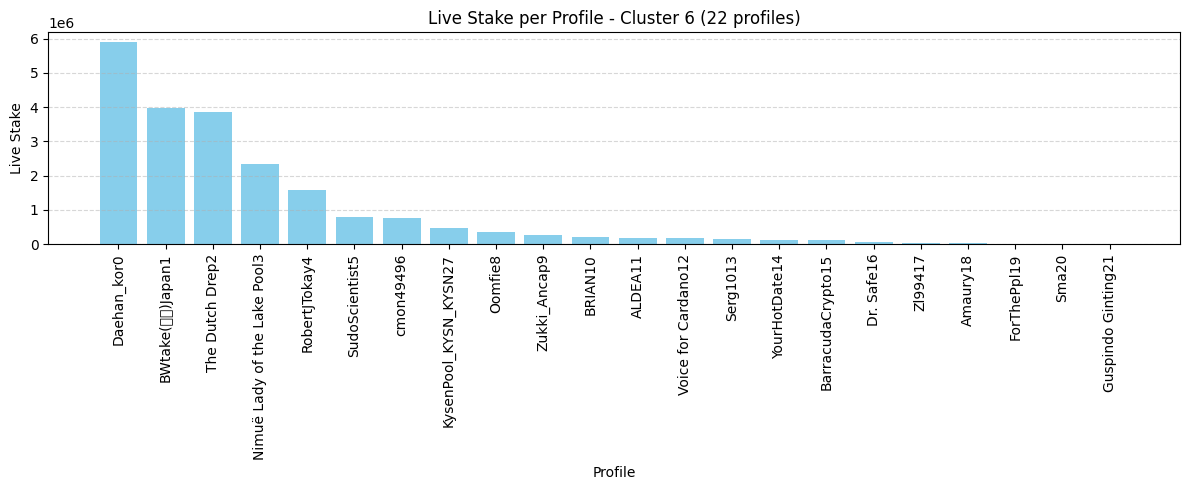

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from 

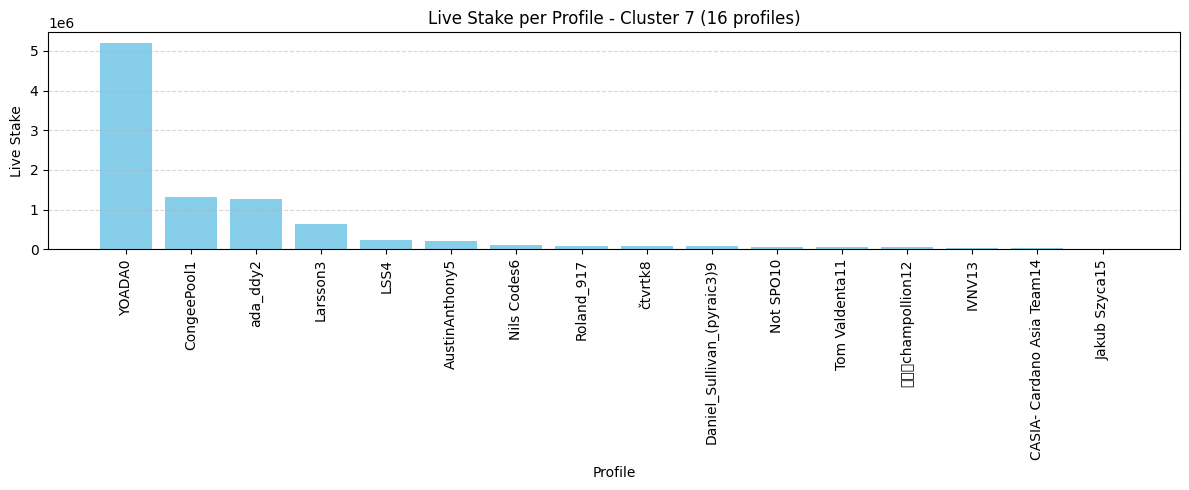

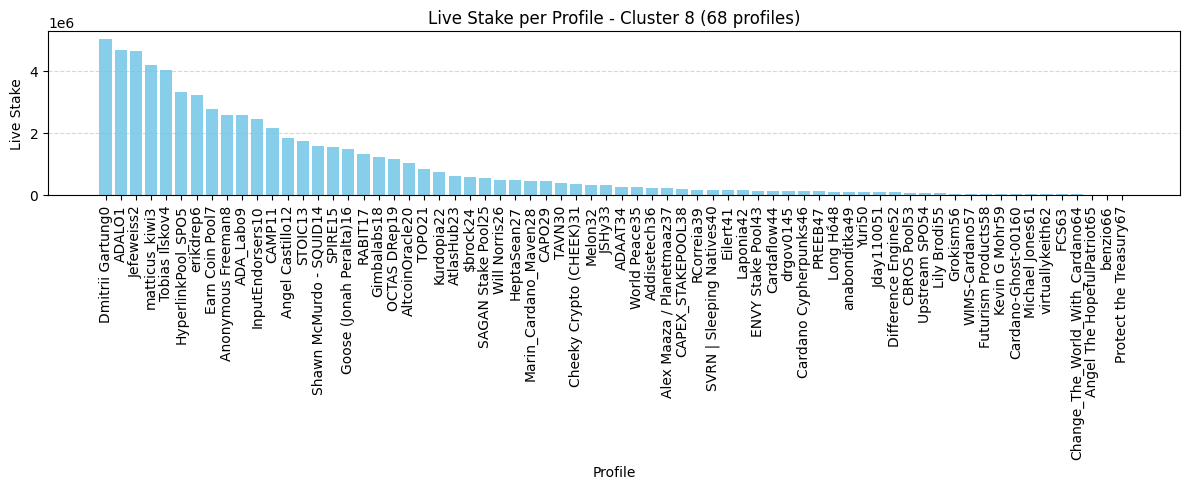

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/682968039.py:13: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


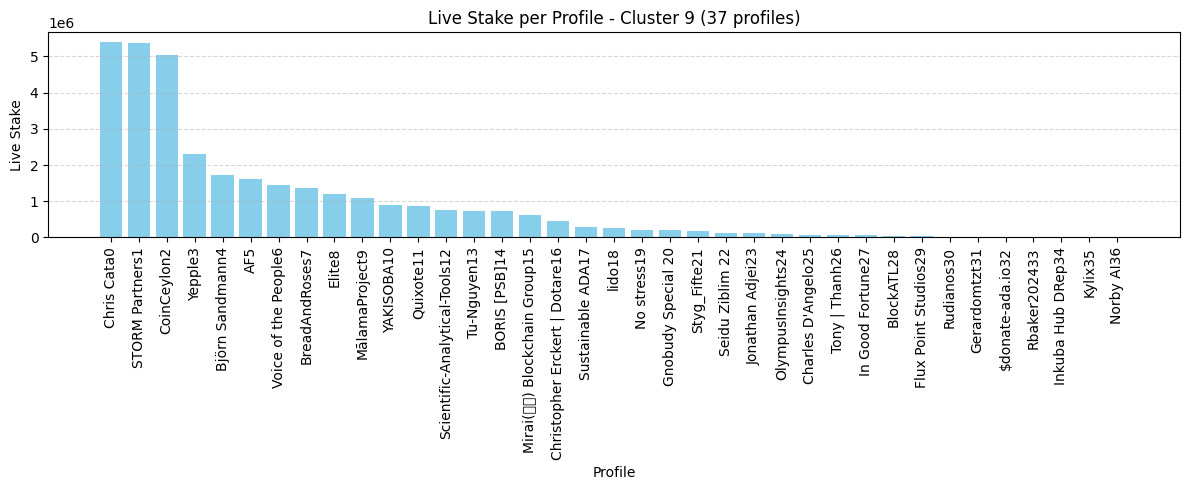

In [3]:
import matplotlib.pyplot as plt

for cluster_id, items in groups.items():
    names = [item['name']+str(i) if item['name'] is not None else f'Unknown_{i}' for i, item in enumerate(items)]
    stakes = [item['live_stake'] for item in items]

    plt.figure(figsize=(12, 5))
    plt.bar(names, stakes, color='skyblue')
    plt.title(f'Live Stake per Profile - Cluster {cluster_id} ({len(items)} profiles)')
    plt.xlabel('Profile')
    plt.ylabel('Live Stake')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_73207/1369366608.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stake_data, labels=labels, patch_artist=True)


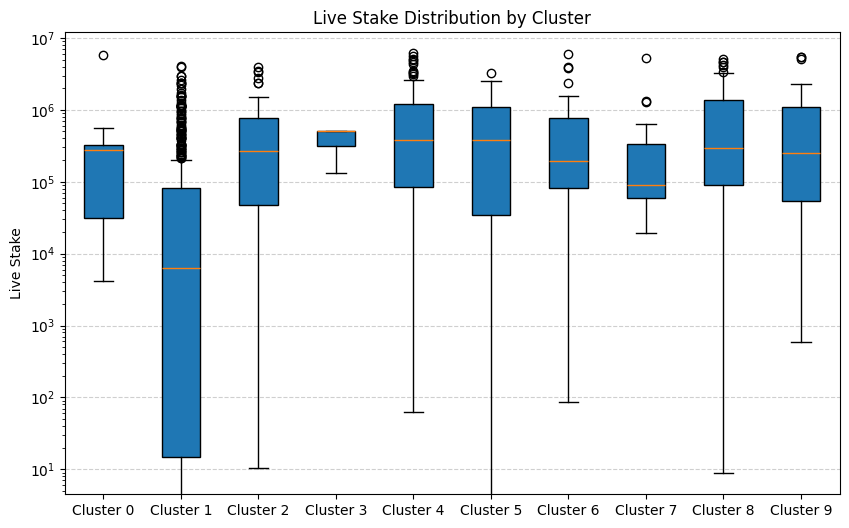

In [4]:
# Prepare data
stake_data = []
labels = []

for cluster_id, items in groups.items():
    stakes = [item['live_stake'] for item in items]
    stake_data.append(stakes)
    labels.append(f'Cluster {cluster_id}')

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(stake_data, labels=labels, patch_artist=True)
plt.title("Live Stake Distribution by Cluster")
plt.ylabel("Live Stake")
# set log scale for y-axis
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
